In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Datascience/Car price prediction/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
final_df =df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#Create a new column 'Current Year' and then calculate the 'no. of years' by subtracting 'Year' from 'Current Year'
final_df['Current_Year']=2021
final_df['no_of_year'] = final_df['Current_Year'] - final_df['Year']
final_df.drop(['Year', 'Current_Year'], axis =1,inplace = True) ##Drop Year and Current year
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [6]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [8]:
# correlation between data
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


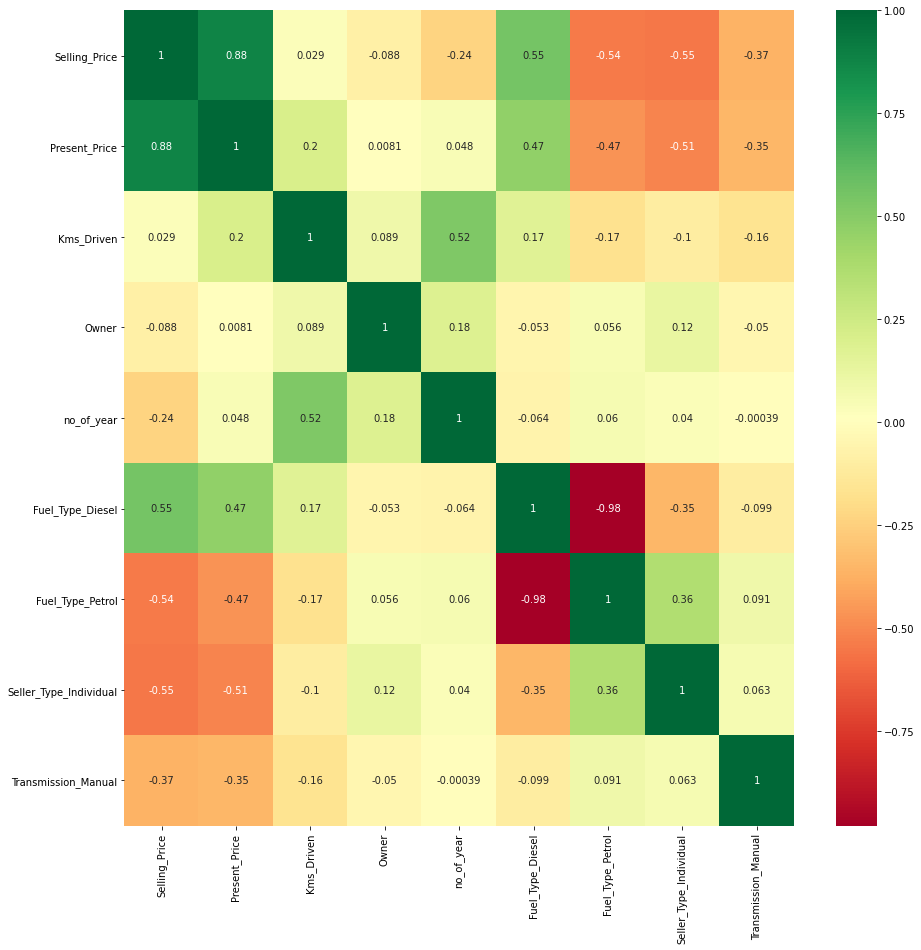

In [12]:
import matplotlib.pyplot as plt
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g = sns.heatmap(final_df[top_corr_features].corr(), annot=True,cmap='RdYlGn')

In [13]:
x=final_df.iloc[:,1:]
y=final_df.iloc[:,0]

In [14]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size =0.2)

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [18]:
#Hyperparameters

#no of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1200, num = 12)]
print(n_estimators)
#no of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum no of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num =6)]
#min no of samples required to split a node
min_samples_split = [2,5,10,15,100]
#min no of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

[200, 290, 381, 472, 563, 654, 745, 836, 927, 1018, 1109, 1200]


In [19]:
from sklearn.model_selection import RandomizedSearchCV
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [20]:
#First create base model to tune
rf = RandomForestRegressor()

In [22]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions =random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs = 1)

In [23]:
rf_random.fit(X_train, Y_train)
predictions = rf_random.predict(x_test)

In [24]:
predictions = rf_random.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


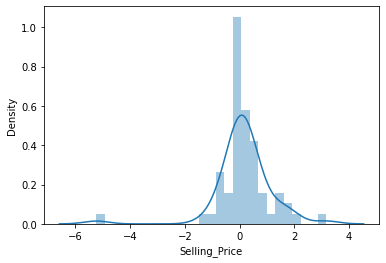

In [25]:
sns.distplot(y_test - predictions)

In [28]:
#Evaluation of the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.596214360572636
Mean Squared Error: 1.0698263185491326
Root Mean Squared Error: 1.034324087773814


array([ 2.93329659,  6.21992385,  5.31424249,  1.19324304,  1.13125061,
        0.31869515,  0.41404294, 21.220515  ,  6.39360294,  0.48978992,
        7.03159087,  7.82623951,  4.49143797,  2.85704805,  0.28661652,
       10.19945516,  4.92857191,  6.23456307,  0.24829239,  5.08220287,
        0.23859406,  4.42630107,  5.54703002, 21.22779292,  3.48568788,
        1.14875347,  0.5000185 ,  7.66486538,  0.42935745,  5.70655459,
        5.15498924,  3.60477355,  0.6721637 ,  9.52910274,  1.13951472,
        5.32535813,  8.07461359,  2.87742372,  4.20683851,  1.1473578 ,
        0.37270824,  1.12729286,  0.63533947,  7.90234349,  1.20514929,
       14.82165405,  0.60735923,  9.69021499,  0.66506452,  0.46949747,
       21.220515  ,  0.85536191,  0.2328204 ,  2.92873534,  3.32257862,
        5.42634507,  4.70180383,  8.2008272 ,  0.25066356,  5.62952342,
        1.95088694])